---
title: OMNI Data Overview
subtitle: "'Near-Earth' solar wind magnetic field and plasma data, energetic proton fluxes (>1 to >60 MeV), and geomagnetic and solar activity indices."
---

In [1]:
import yaml

import pyspedas
from pytplot import tplot, options
from pytplot import get_data
from utils import Config, PanelConfig, OutputConfig


import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "nature", "notebook"])
plt.rc("savefig", dpi=300)

In [2]:
file_path = './omni.yml'

In [3]:
config = yaml.load(open(file_path), Loader=yaml.FullLoader)
config = Config(**config)
tvars2plot = []

In [4]:
def process(tvar):
    res = 3600 * 24 * 2
    tvar2plot = pyspedas.avg_data(tvar, res=res)

    if isinstance(tvar2plot, list):
        return tvar2plot[0]
    else:
        return tvar2plot


In [5]:
def load_data(config: PanelConfig, load_func= pyspedas.omni.data):
    
    if load_func is None:
        mod = getattr(pyspedas, config.satellite)
        load_func = getattr(mod, config.instrument)
    
    
    load_args = {
        "trange": [ time.isoformat() for time in config.timerange],
        "time_clip": True,
        'varnames': config.id,
    }
    
    # Conditionally add the 'datatype' and 'probe' argument
    if config.datatype is not None:
        load_args["datatype"] = config.datatype
    if config.probe is not None:
        load_args["probe"] = config.probe
        
    return load_func(**load_args)

In [ ]:
def update_tvar(tvar, config: PanelConfig):
    
    if config.name:
        options(tvar, 'ytitle', f'{config.name}')
    if config.units:
        options(tvar, 'ysubtitle', f'[{config.units}]')
    
    return tvar

In [6]:
def process_panel(config: PanelConfig):
    tvar = load_data(config)

    if isinstance(tvar, list):
        tvar = tvar[0]

    tvar_processed = process(tvar, config=config.process)
    tvar_updated = update_tvar(tvar_processed, config=config)

    return tvar_updated

In [7]:
for p_config in config.panels:
    tvar2plot = process_panel(p_config)
    tvars2plot.append(tvar2plot)

20-Jan-24 14:10:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hourly/2011/
20-Jan-24 14:10:15: File is current: /Users/zijin/data/omni/hourly/2011/omni2_h0_mrg1hr_20110701_v01.cdf
20-Jan-24 14:10:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hourly/2012/
20-Jan-24 14:10:15: File is current: /Users/zijin/data/omni/hourly/2012/omni2_h0_mrg1hr_20120101_v01.cdf
20-Jan-24 14:10:15: File is current: /Users/zijin/data/omni/hourly/2012/omni2_h0_mrg1hr_20120701_v01.cdf
20-Jan-24 14:10:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hourly/2013/
20-Jan-24 14:10:15: File is current: /Users/zijin/data/omni/hourly/2013/omni2_h0_mrg1hr_20130101_v01.cdf
20-Jan-24 14:10:16: File is current: /Users/zijin/data/omni/hourly/2013/omni2_h0_mrg1hr_20130701_v01.cdf
20-Jan-24 14:10:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hourly/2014/
20-Jan-24 14:10:16: File is

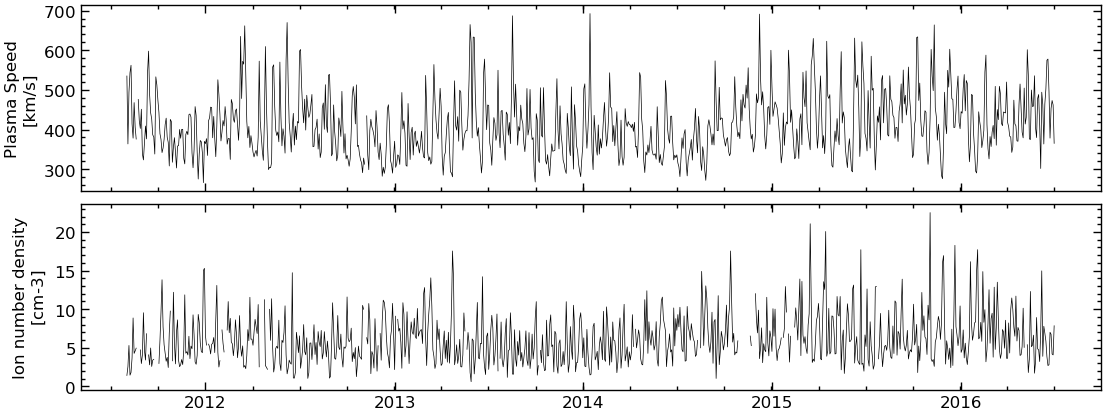

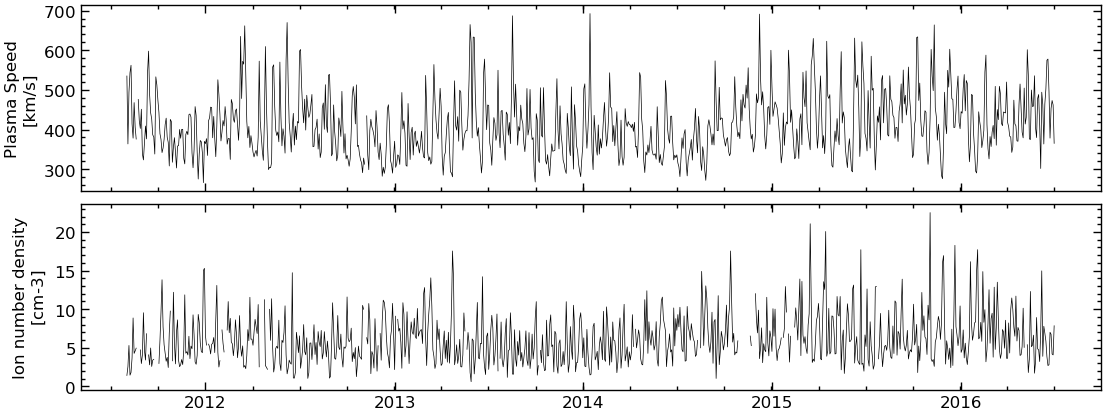

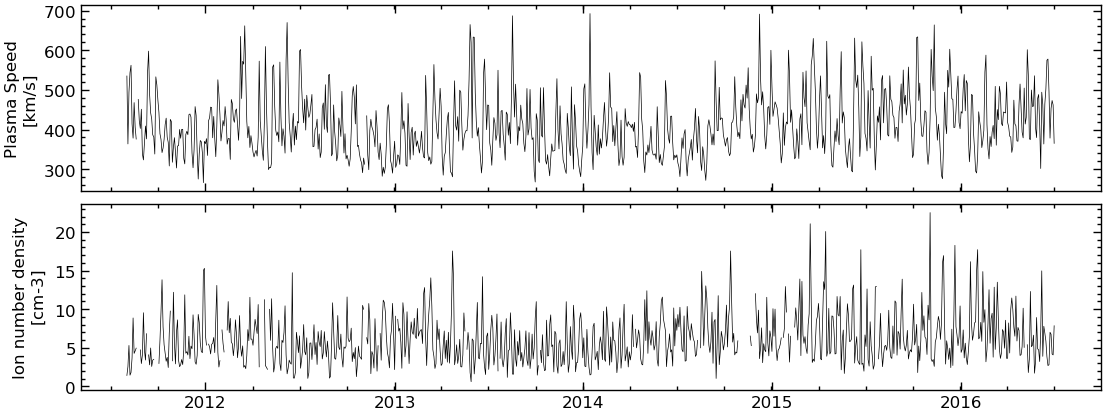

In [12]:
export(config.output, tvars2plot)